<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras import callbacks
from keras.callbacks import EarlyStopping

from keras.utils import np_utils
from keras.datasets import mnist #data mnist


11501568/11490434 [==============================] - 0s 0us/step


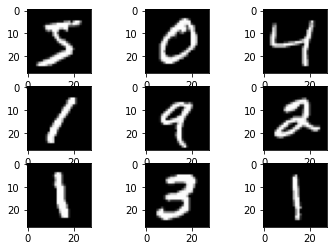

(60000, 28, 28) (10000, 28, 28) (10000,) (60000,)


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
for i in range (9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
model3 = Sequential()
model3.add(Dense(512,activation = 'relu', input_shape = (784,)))
model3.add(Dropout(0.2))
model3.add(Dense(512,activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation = 'softmax'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model3.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_data=(x_test,y_test))

Epoch 1/500
469/469 [==============================] - 13s 25ms/step - loss: 0.2444 - accuracy: 0.9246 - val_loss: 0.1035 - val_accuracy: 0.9677
Epoch 2/500
469/469 [==============================] - 16s 35ms/step - loss: 0.0999 - accuracy: 0.9689 - val_loss: 0.1004 - val_accuracy: 0.9711
Epoch 3/500
469/469 [==============================] - 8s 16ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0793 - val_accuracy: 0.9781
Epoch 4/500
469/469 [==============================] - 7s 16ms/step - loss: 0.0597 - accuracy: 0.9826 - val_loss: 0.0940 - val_accuracy: 0.9765
Epoch 5/500
469/469 [==============================] - 7s 16ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0771 - val_accuracy: 0.9799
Epoch 6/500
469/469 [==============================] - 7s 16ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0925 - val_accuracy: 0.9784
Epoch 7/500
469/469 [==============================] - 8s 16ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0876 - val_accurac

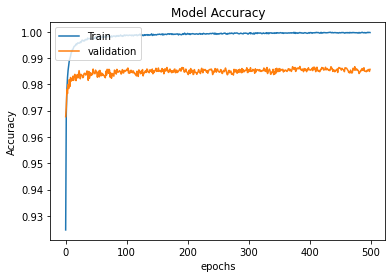

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model3.save('Handwriting.h5')